# Smoothing Spectroscopy Data by Fast Fourier Transform

## 1. Importing Library

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
 
from scipy.signal import general_gaussian

plt.rcParams['figure.figsize'] = [16,12]
plt.rcParams.update({'font.size': 18})

## 2. Importing and Plotting Spectroscopy Data

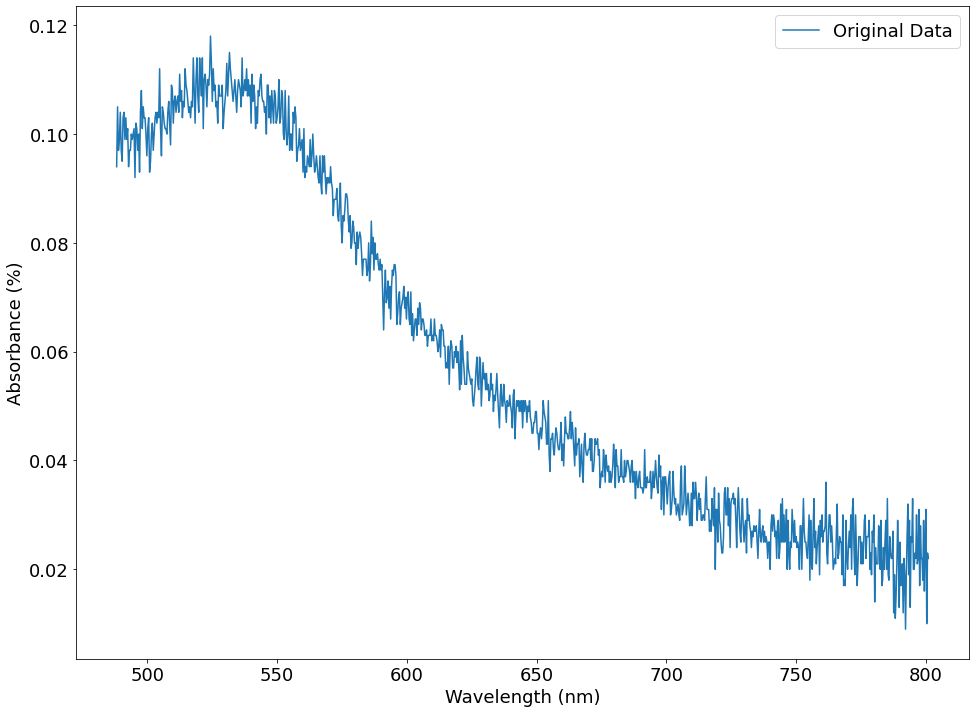

In [8]:

data = pd.read_excel('/content/Dye 500rpm 4L.Master.xlsx')
X = data['abs'].values
wl = data['nm'].values


plt.plot(wl,X, label = 'Original Data')
plt.xlabel('Wavelength (nm)')
plt.ylabel('Absorbance (%)')
plt.legend(loc=0)
plt.show()

## 3. Generate Filter

### We used Gaussian Function for filtering data
\begin{equation}
g(x) = A \exp{\left(\frac{-(x-x_0)^2}{2σ^2}\right)^m} 
\end{equation}




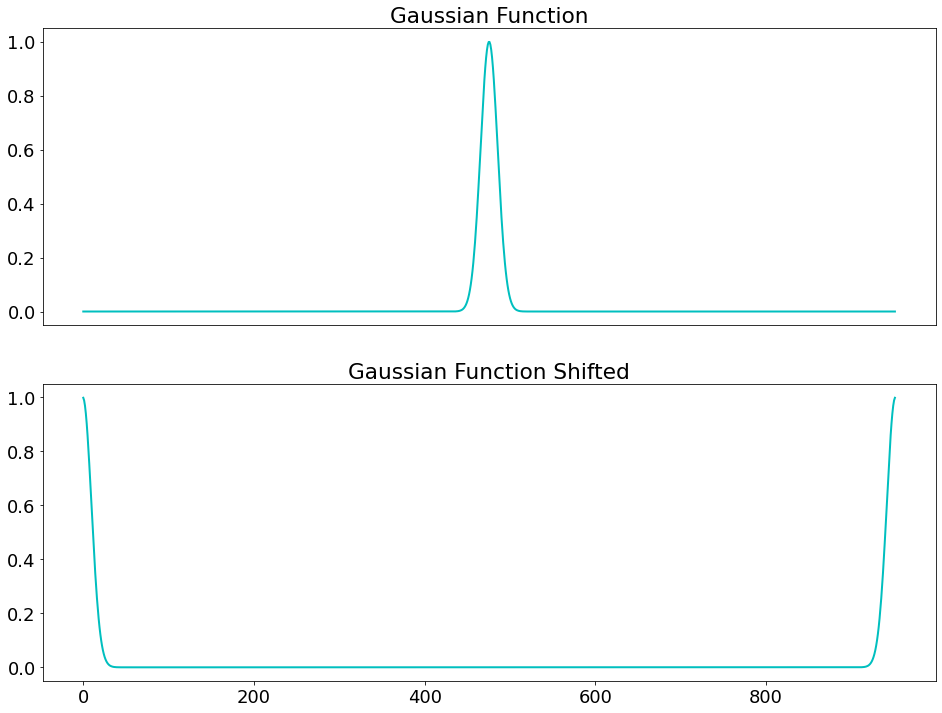

In [37]:
sigma = 10 #Deviation gaussian function, but in this case it be smoothing parameter
m = 1
win = np.roll(general_gaussian(X.shape[0], m, sigma), X.shape[0]//2)

fig,axs = plt.subplots(2,1)

plt.sca(axs[0])
plt.plot(general_gaussian(X.shape[0], m, sigma),color='c',linewidth=2)
plt.title('Gaussian Function')
plt.xticks([])

plt.sca(axs[1])
plt.plot(win,color='c',linewidth=2)
plt.title('Gaussian Function Shifted')
plt.show()

## 4. Mirroring Data
### Mirroring data so that we get one wave wavelength.

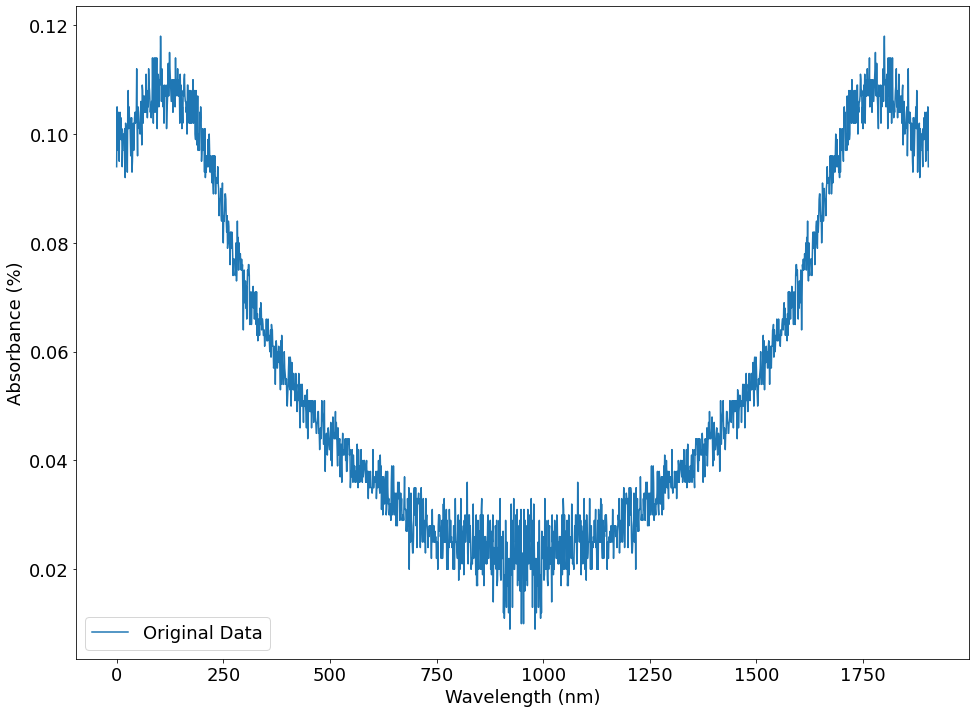

In [38]:
XX = np.hstack((X,np.flip(X)))

wlnew =[]
for x in range (len(wl)*2):
  wlnew.extend([int(x)])

plt.plot(wlnew,XX, label = 'Original Data')
plt.xlabel('Wavelength (nm)')
plt.ylabel('Absorbance (%)')
plt.legend(loc=0)
plt.show()

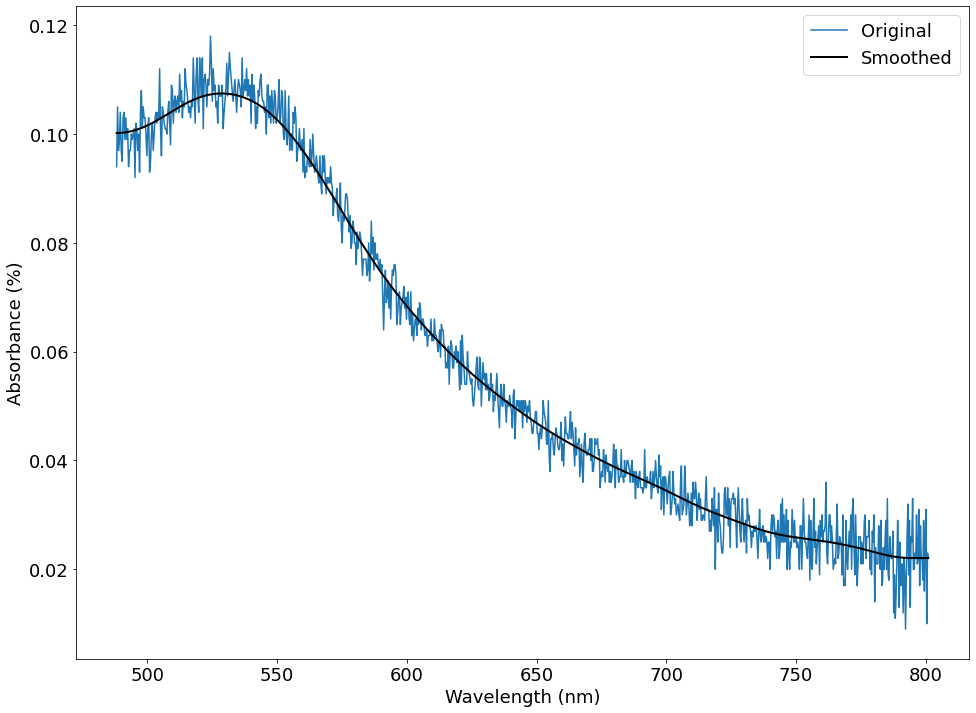

In [39]:
win = np.roll(general_gaussian(XX.shape[0], m, sigma), XX.shape[0]//2)
fXX = np.fft.fft(XX)
XXf = np.real(np.fft.ifft(fXX*win))[:X.shape[0]]

plt.plot(wl, X, label='Original')
plt.plot(wl, XXf, label='Smoothed', color='k',linewidth=2)
plt.xlabel('Wavelength (nm)')
plt.ylabel('Absorbance (%)')
plt.legend(loc=0)
plt.show()